<script type="text/javascript" src="https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS_HTML"></script>

In [1]:
%load_ext autoreload
%autoreload 2

# Intro Language Modelling in Pytorch

## Language Model

# Overview

Language modeling is a fundamental task in natural language processing (NLP) that involves predicting or estimating the likelihood of a sequence of words or tokens in a language. The main goal of language modeling is to capture the structure and patterns of language in order to generate coherent and natural-sounding text.

Let's take the following sentence:
***<p style="text-align: center">Anuj is an ____***</p>


What do you think the next word or few words would be in this sentence?

| Next Phrase    | Likely?          |
| -------------- | ---------------- |
| idiot          | high likely      |
| moron          | likely           |
| a muppet       | somewhat likely  |
| February       | unlikely         |
| .              | .                |
| .              | .                |
| asdasdasd      | highly unlikely  |
| awesome person | practically zero |

Inuitively from our own understanding of natural language we can form some opinion of what words or characters are most likely to come next. Some of this is based on the fundemental constructs of natural language like syntax and grammer, but I believe our intuition is largely formed inductively through the confluence of choice words.

## Definition


Consider a sequence of random variables $X$ where $\langle X_1, X_i, X_j, \ldots, X_n\rangle \quad \forall i,j \in {1, 2, \ldots, n},\ i < j \Rightarrow X_i \neq X_j$ Each random variable $X_i$ can take any value in a finite set ${\mathcal{V}}$. 

We can model the probability of any sequence of words $w_1 \ldots w_n$, where $n \geq 1$ and $w_i \in V$ for $i = 1 \ldots n$ as the following joint probability distribution.

\begin{align}
P(X_1 = w_1, X_2 = w_2, ..., X_n = w_n)
\end{align}

<div class="definition">
<b>Definition 1:</b> A language model consists of a finite set ${\mathcal{V}}$, and a function $P(X_1 = w_1, X_2 = w_2, ..., X_n = w_n)$ such that:

1. For any $\langle w_1, w_2, ..., w_n \rangle \in {\mathcal{V}}$ , $P(X_1 = w_1, X_2 = w_2, ..., X_n = w_n) \geq 0$
2. In addition,
\begin{align}
\sum_{w_1...w_i \in {\mathcal{V}}} P(X_1 = w_1, X_2 = w_2, ..., X_n = w_n) = 1
\end{align}
</div>


Formally given a sequence of tokens or words $w_1, w_2, ..., w_n$, a language model calculates the probability of observing that sequence. $P(X_1 = w_1, X_2 = w_2, ..., X_n = w_n)$. More succintly we will express this henceforth as $P(w_1, w_2, ..., w_n)$


However estimating the joint probability directly would require ${\mathcal{V}}^n$ possible sequences of the form $w_1... w_n$ and therefore not feasible. Luckily this probability can be decomposed using the chain rule of probability to link computing the joint probability of a sequence and computing the conditional probability of a word given previous words. 


\begin{equation}
\begin{aligned}
P(w_1, w_2, ..., w_n) &=P(w_1) \cdot P(w_2 | w_1) \cdot P(w_3 | w_1, w_2) \cdot ... \cdot P(w_n | w_1, w_2, ..., w_{n-1}) \\
 &= \prod_{i=1}^{n} P(w_i | w_{1},, ..., w_{i-1}) \\
\end{aligned}
\end{equation}

where $P(w_i|w_1, ..., w_{i-1})$ is the probability of observing the $i$-th word given the previous words.

By breaking down the probability of the sentence in this way, we only need to estimate the probability of each word given the previous words rather than estimating the probabilities of all possible word sequences. This decomposition can also help to address the issue of data sparsity, as we only need to estimate the probabilities of each word in the context of its preceding words.

## N-Grams and the Markov Assumption

One way to approach language modeling is through the use of n-grams, which are sequences of n words that occur together in a text. 

### N-Gram Language Model:
$$P(w_1,w_2,...,w_n) = \prod_{i=1}^n P(w_i | w_{1}, ..., w_{i-N})$$

N-grams instrinsicly make use of the markov assumption. The Markov assumption is a key assumption in many statistical and probabilistic models that states that the probability of a future event only depends on the current state or condition, and not on the entire history of past events. In the context of language modeling:
    
<div class="definition">
<b>Definition 2:</b> The Markov Assumption states for observing a finite sequence $\{x_1,...,x_n\} \in {\mathcal{X}}$ the probability of observing the event $P(X_1 = x_1, X_2 = x_2, ..., X_n = x_n).\\\\$

\begin{equation}
\begin{aligned}
P(X_1 = x_1, X_2 = x_2, ..., X_n = x_n) &=P(X_1 = x_1) \cdot P(X_2 = x_2 | X_1 = x_1) \cdot ... \cdot P(X_n = x_n | X_1 = x_1, X_2 = x_2, ..., X_1 = x_{n-1}) \\
&= \prod_{i=1}^{n} P(X_i = x_i | X_{1} = x_{1}, ..., X_{i-1} = x_{i-1}) \\
&\approx \prod_{i=1}^{n} P(X_i = x_i | X_{i-1} = x_{i-1})
\end{aligned}
\end{equation}

Using this property we can create more compact models such as the unigram, bigram and trigram language models which are commonly used in a variety of application in NLP.
    
### Unigram Language Model:
$$P(w_1,w_2,...,w_n) \approx \prod_{i=1}^n P(w_i)$$
In the unigram model, the probability of a word in a sequence is independent of the context or any other words in the sequence. The probability of a sequence is simply the product of the probabilities of each individual word.

### Bigram Language Model:
$$P(w_1,w_2,...,w_n) \approx \prod_{i=1}^n P(w_i|w_{i-1})$$
In the bigram model, the probability of a word in a sequence depends only on the previous word in the sequence. The probability of a sequence is the product of the probabilities of each word given its preceding word.

### Trigram Language Model:
$$P(w_1,w_2,...,w_n) \approx \prod_{i=1}^n P(w_i|w_{i-1},w_{i-2})$$
In the trigram model, the probability of a word in a sequence depends on the previous two words in the sequence. The probability of a sequence is the product of the probabilities of each word given its preceding two words.
    

In [4]:
T = ['The dog ate my homework', 'The dog ate my lunch']


P(X1 = 'homework') = Count('homework') / Count(ALL WORDS) 

P(X5 = 'homework'| X1= 'The', X2='dog', X3='ate', X4='my') = Count('The dog ate my homework') / Count('The dog ate my') = 1/2




SyntaxError: invalid syntax. Perhaps you forgot a comma? (3361032972.py, line 4)

In [5]:
p = ??

['H','T','H','T','H','T','H','T','H','T']




SyntaxError: invalid syntax (1062352075.py, line 1)

## Maximum Liklihood Estimation

The maximum likelihood estimate (MLE) is a commonly used method to estimate the parameters of a statistical model. In the case of a language model, the parameters are the probabilities of observing a particular word given a sequence of preceding words. This can be expressed as:

\begin{equation}
\mathcal{L}(\theta) = \prod_{i=1}^{T} P(w_i | w_{i-N+1}, ..., w_{i-1}; \theta)
\end{equation}

Here, $\theta$ represents the set of parameters that we want to estimate. These parameters are the conditional probabilities of a word given its (n-1)-word context, i.e., $P(w_i | w_{i-1}, ... w_{i-N+1}$ for all possible combinations of words in the context. $T$ is the length of the training data and $N$ is the window of the N-gram.

\begin{equation}
\hat{\theta} = \arg\max_{\theta} \prod_{i=1}^{T} P(w_i | w_{i-N+1}, ..., w_{i-1}; \theta)
\end{equation}

The objective of MLE is find the values of $\theta$ that maximize the likelihood of the observed data.

\begin{equation}
\theta^{MLE} = \arg\max_{\theta} \prod_{i=1}^{T} P(w_i | w_{i-N+1}, ..., w_{i-1}; \theta)
\end{equation}

For computational simplicity, we often work with the log-likelihood instead of the likelihood, as the product of probabilities can become very small and cause numerical instability. The log-likelihood is:

\begin{equation}
\theta^{MLE} = \arg\max_{\theta} \sum_{i=1}^{N} \log P(w_i | w_{i-N+1}, ..., w_{i-1}; \theta)
\end{equation}

In practice, the MLE parameters can be estimated using the relative frequencies of the n-grams in the training data.

\begin{align}
\theta_{w_i...w_{i-N+1}}^{MLE} = P(w_i | w_{i-N+1}, ..., w_{i-1}) &= \frac{C(w_{i-N+1},...,w_{i})}{\sum_{w \in \mathcal{V}} C(w_{i-N+1},...,w_{i-1}, w)} \\
\end{align}


#### Unigram Model MLE:

\begin{align}
p(w_i) = \frac{C(w_i)}{\sum_{w \in \mathcal{V}} C(w)}
\end{align}

In this expression, $p(w_i)$ is the probability of observing the word $w_i$, $C(w_i)$ is the count of occurrences of the word $w_i$ in the corpus, and $\sum_w C(w)$ is the total count of words in the corpus.

#### Bigram Model MLE

\begin{align}
p(w_i | w_{i-1}) = \frac{C(w_{i-1}, w_i)}{\sum_{w \in \mathcal{V}} C(w_{i-1}, w)}
\end{align}

In this expression, $p(w_i | w_{i-1})$ is the probability of observing the word $w_i$ given the previous word $w_{i-1}$, $C(w_{i-1}, w_i)$ is the count of occurrences of the bigram $(w_{i-1}, w_i)$ in the corpus, and $\sum_{w} C(w_{i-1}, w)$ is the total count of bigrams that start with the word $w_{i-1}$.


#### Trigram Model MLE
\begin{align}
p(w_i | w_{i-1}, w_{i-2}) = \frac{C(w_{i-2}, w_{i-1}, w_i)}{\sum_{w \in \mathcal{V}} C(w_{i-2}, w_{i-1}, w)}
\end{align}

In this expression, $p(w_i | w_{i-1}, w_{i-2})$ is the probability of observing the word $w_i$ given the two previous words $w_{i-1}$ and $w_{i-2}$, $C(w_{i-2}, w_{i-1}, w_i)$ is the count of occurrences of the trigram $(w_{i-2}, w_{i-1}, w_i)$ in the corpus, and $\sum_{w'} C(w_{i-2}, w_{i-1}, w)$ is the total count of trigrams that start with the sequence of words $(w_{i-2}, w_{i-1})$.



### Proof MLE for Bigram

For any given sequence of words $\textbf{w}$ of $|\textbf{w}| = n$ e.g $w = \langle w_1, w_2, w_1, w_5, w_7, w_2\rangle$. It follows:

\begin{align}
P(\textbf{w}) = \prod\limits_{i=1}^{n}P(w_i)^{s(w_i)}\prod\limits_{i=1}^{n}\prod\limits_{j=1}^{n}P(w_j|w_i)^{C(w_i, w_j)}
\end{align}

where $C(w_i, w_j)$ is the count of word sequence $w_i, w_j$ in the sentence and

\begin{align}
s(w_i) = 
\begin{cases}
    1, & \text{if } w_i \text{ is the first word} \\
    0, & \text{otherwise}
\end{cases}
\end{align}

By maximizing $P(w)$, we are essentially trying to find the best set of probabilities for the n-gram language model that maximizes the likelihood of the observed data. We start by taking the logs and constructing the following optimization problem.

\begin{aligned}
\log P(\textbf{w}) &= \sum\limits_{i=1}^{n} s(w_i) \log P(w_i) + \sum\limits_{i=1}^{n}\sum\limits_{j=1}^{n} C(w_i, w_j) \log P(w_j|w_i) \\
\end{aligned}

\begin{align}
\max \log P(w), \forall i \in {1 \ldots n} \text{ subject to }\sum\limits_{j=1}^{n} P(w_j|w_i) = 1
\end{align}

We introduce auxiliary optimization function using the Lagrange multiplier ($\sum\limits_{j=1}^{n} p(w_j|w_i) - 1 = 0$):

\begin{aligned}
\mathcal{L}(\lambda) = \sum\limits_{i=1}^{n} s(w_i) \log p(w_i) + \sum\limits_{i=1}^{n}\sum\limits_{j=1}^{n} C(w_i, w_j) \log p(w_j|w_i) + \sum\limits_{i=1}^{n} \lambda_i \left(\sum\limits_{j=1}^{n} p(w_j|w_i) - 1\right)
\end{aligned}

For any $p(w_k|w_i)$, we take the derivatives of $L$ respective to $p(w_k|w_i)$:

\begin{aligned}
\frac{\partial L}{\partial p(w_k|w_i)} &= C(w_i, w_k)\frac{1}{p(w_k|w_i)} + \lambda_i = 0 \\
p(w_k|w_i) &= -\frac{C(w_i, w_k)}{\lambda_i}
\end{aligned}

Because $\sum\limits_{j=1}^{n} P(w_j|w_i) = 1$

\begin{aligned}
\sum\limits_{j=1}^{n} p(w_j|w_i) &= \sum\limits_{j=1}^{n} -\frac{C(w_i, w_j)}{\lambda_i} \\
&= -\frac{1}{\lambda_i}\sum\limits_{j=1}^{n} C(w_i, w_j) \\
&= -\frac{1}{\lambda_i}\left(\sum\limits_{j=1}^{n} c(w_i, w_j)\right) \\
&= -\frac{1}{\lambda_i} \\
\lambda_i &= -\sum\limits_{j=1}^{n} C(w_i, w_j)
\end{aligned}

Because $p(w_k|w_i) = \frac{C(w_i, w_k)}{\sum\limits_{j=1}^{n} C(w_i, w_j)}$, therefore

$$
P(w_k|w_i) = \frac{C(w_i, w_k)}{\sum\limits_{j=1}^{n} C(w_i, w_j)}
$$

## Building a Character Level Bigram Language Model with Pytorch


### Introduction
In this tutorial we will be creating our own bigram language model to perform next character prediction. Our goal is to primarily get familiar
with Pytorch by using the library to manipulate tensors. 

We will demonstrate how this simple language model can be used to generate names, albeit, rather poorly but hopefully provide foundational
knowledge on language models that will extend to more powerful models in the future.


Note this tutorial is largely inspired by Andrej Karpathy's makemore[!https://www.youtube.com/@AndrejKarpathy] videos, which i suggest you checkout if you have additional time.

#### How can building a language model be used for next character prediction ?

We'll rewrite some of our notation from above to build some more intuition about the next sequence prediction task. 

Let's represent an input sequence $\textbf{x}$ and an output sequence $\textbf{y}$ both as sequence of characters $c_1c_2c_3...,c_n$, where $c_i$ is a letter of the english alphabet ${\mathcal{C}}$. Our goal is to learn a function $f(x) = \hat{y}$ such that:  


\begin{align}
\hat{y} = \arg \max_{y \in \mathcal{Y}} P(\textbf{y} | \textbf{x})
\end{align}

where $\mathcal{Y}$ is the set of all possible sequences of characters and $\hat{y}$ is the predicted output sequence of characters.

The expression represents the idea that we want to find the output sequence $\hat{y}$ that maximizes the probability of observing the true output sequence $y$ given the input prefix sequence $x$. This is a common approach to language modeling, where we model the probability distribution of output sequences given input sequences, and use this model to predict the most likely output sequence for a given input sequence.

We know from earlier that there are multiple ways to model $P(\textbf{y} | \textbf{x})$. Using a bigram model this would look like:

\begin{aligned}
P(\textbf{y} | \textbf{x}) &= \prod_{i=1}^n P(c_i|c_{i-1} ... c_{i-n}) \\ 
&\approx \prod_{i=1}^n P(c_i|c_{i-1}) \\
&=\frac{C(c_{i-1}, c_i)}{\sum_{c \in \mathcal{C}} C(c_{i-1}, c)}
\end{aligned}


#### Step 1: Reading the Data


Let's start by reading in our dataset which comprises of a list of `32033` names.

In [6]:
from utilities import read_file #helper function for reading in files.


names = list(read_file('names.txt'))

print(f'Total number of names: {len(names)}')
names[:10]

Total number of names: 32033


['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

#### Step 2: Preprocessing our data

- Create bigram pairs.
- Add Start and End Tokens
- Create dictionary of bigram counts.


In [7]:

b= {}
for n in names:
    n = ['<S>'] + list(n) + ['<E>']
    for c1, c2 in zip(n, n[1:]):
        b[(c1,c2)] = b.get((c1,c2),0) + 1

#### Step 3: Create bigram torch tensors
- Create torch tensor. (Look at dtype)
- Create count matrix.
- Create ctoi mapping
- Create itos Mapping
- Plot bigrams

In [10]:
import torch

N = torch.zeros((28,28),dtype=torch.int32)

In [11]:
import torch
N = torch.zeros((28,28), dtype=torch.int32)
C = sorted(list(set(''.join(names))))
ctoi = {c:i+1 for i,c in enumerate(C)}
ctoi['<S>'] = 0
ctoi['<E>'] = 27
sorted(ctoi.items(), key = lambda v: v[1])
for n in names:
    n = ['<S>'] + list(n) +['<E>']
    for c1, c2 in zip(n, n[1:]):
        b[(c1,c2)] = b.get((c1,c2),0) + 1 
        ix1, ix2 = ctoi[c1], ctoi[c2]
        N[ix1, ix2] += 1

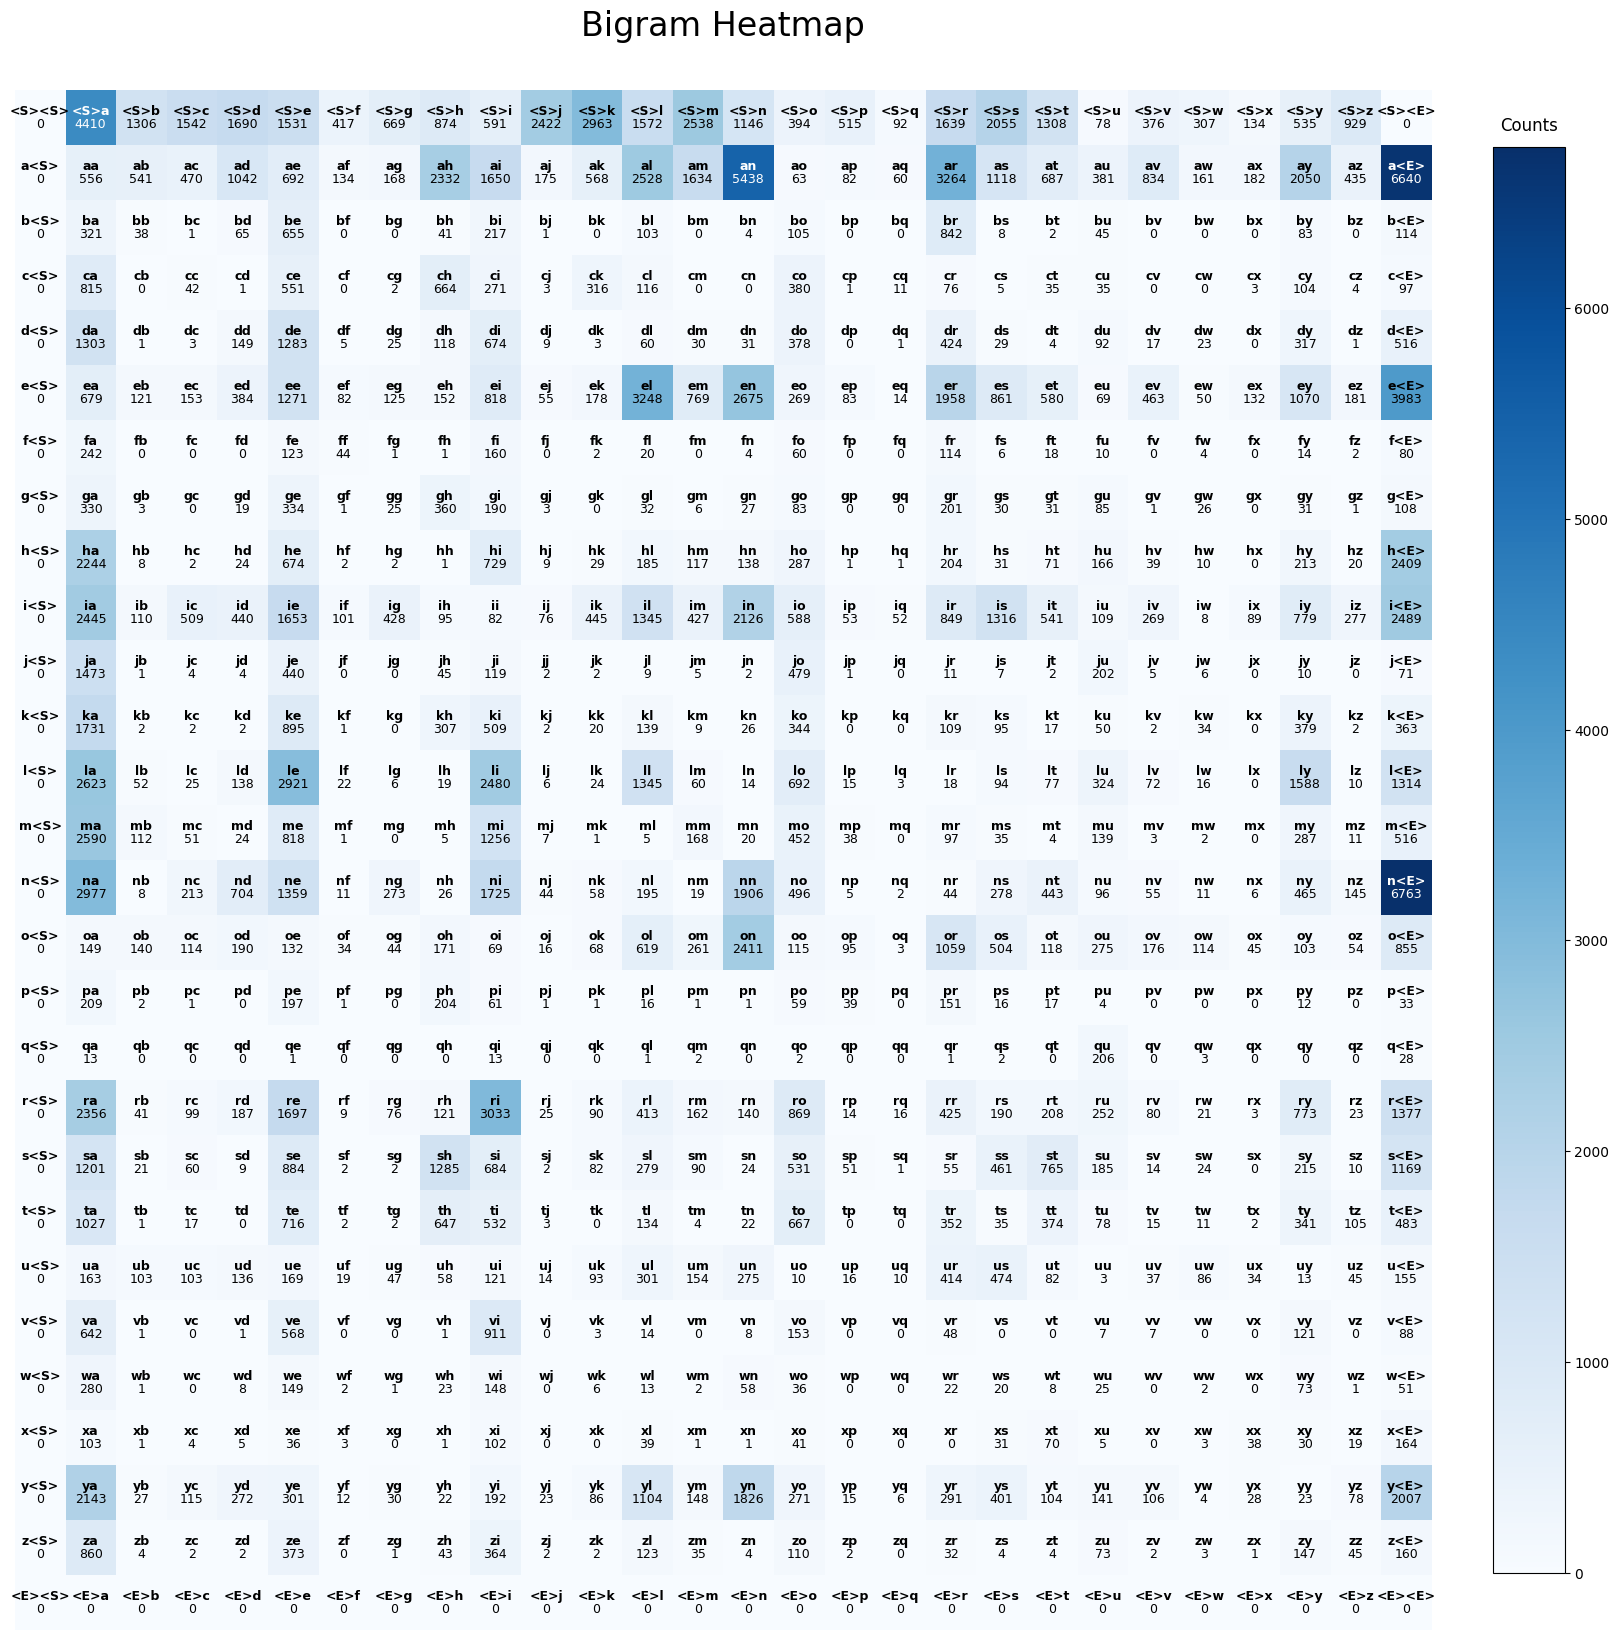

In [12]:
from utilities import plot_char_matrix

plot_char_matrix(ctoi, N)

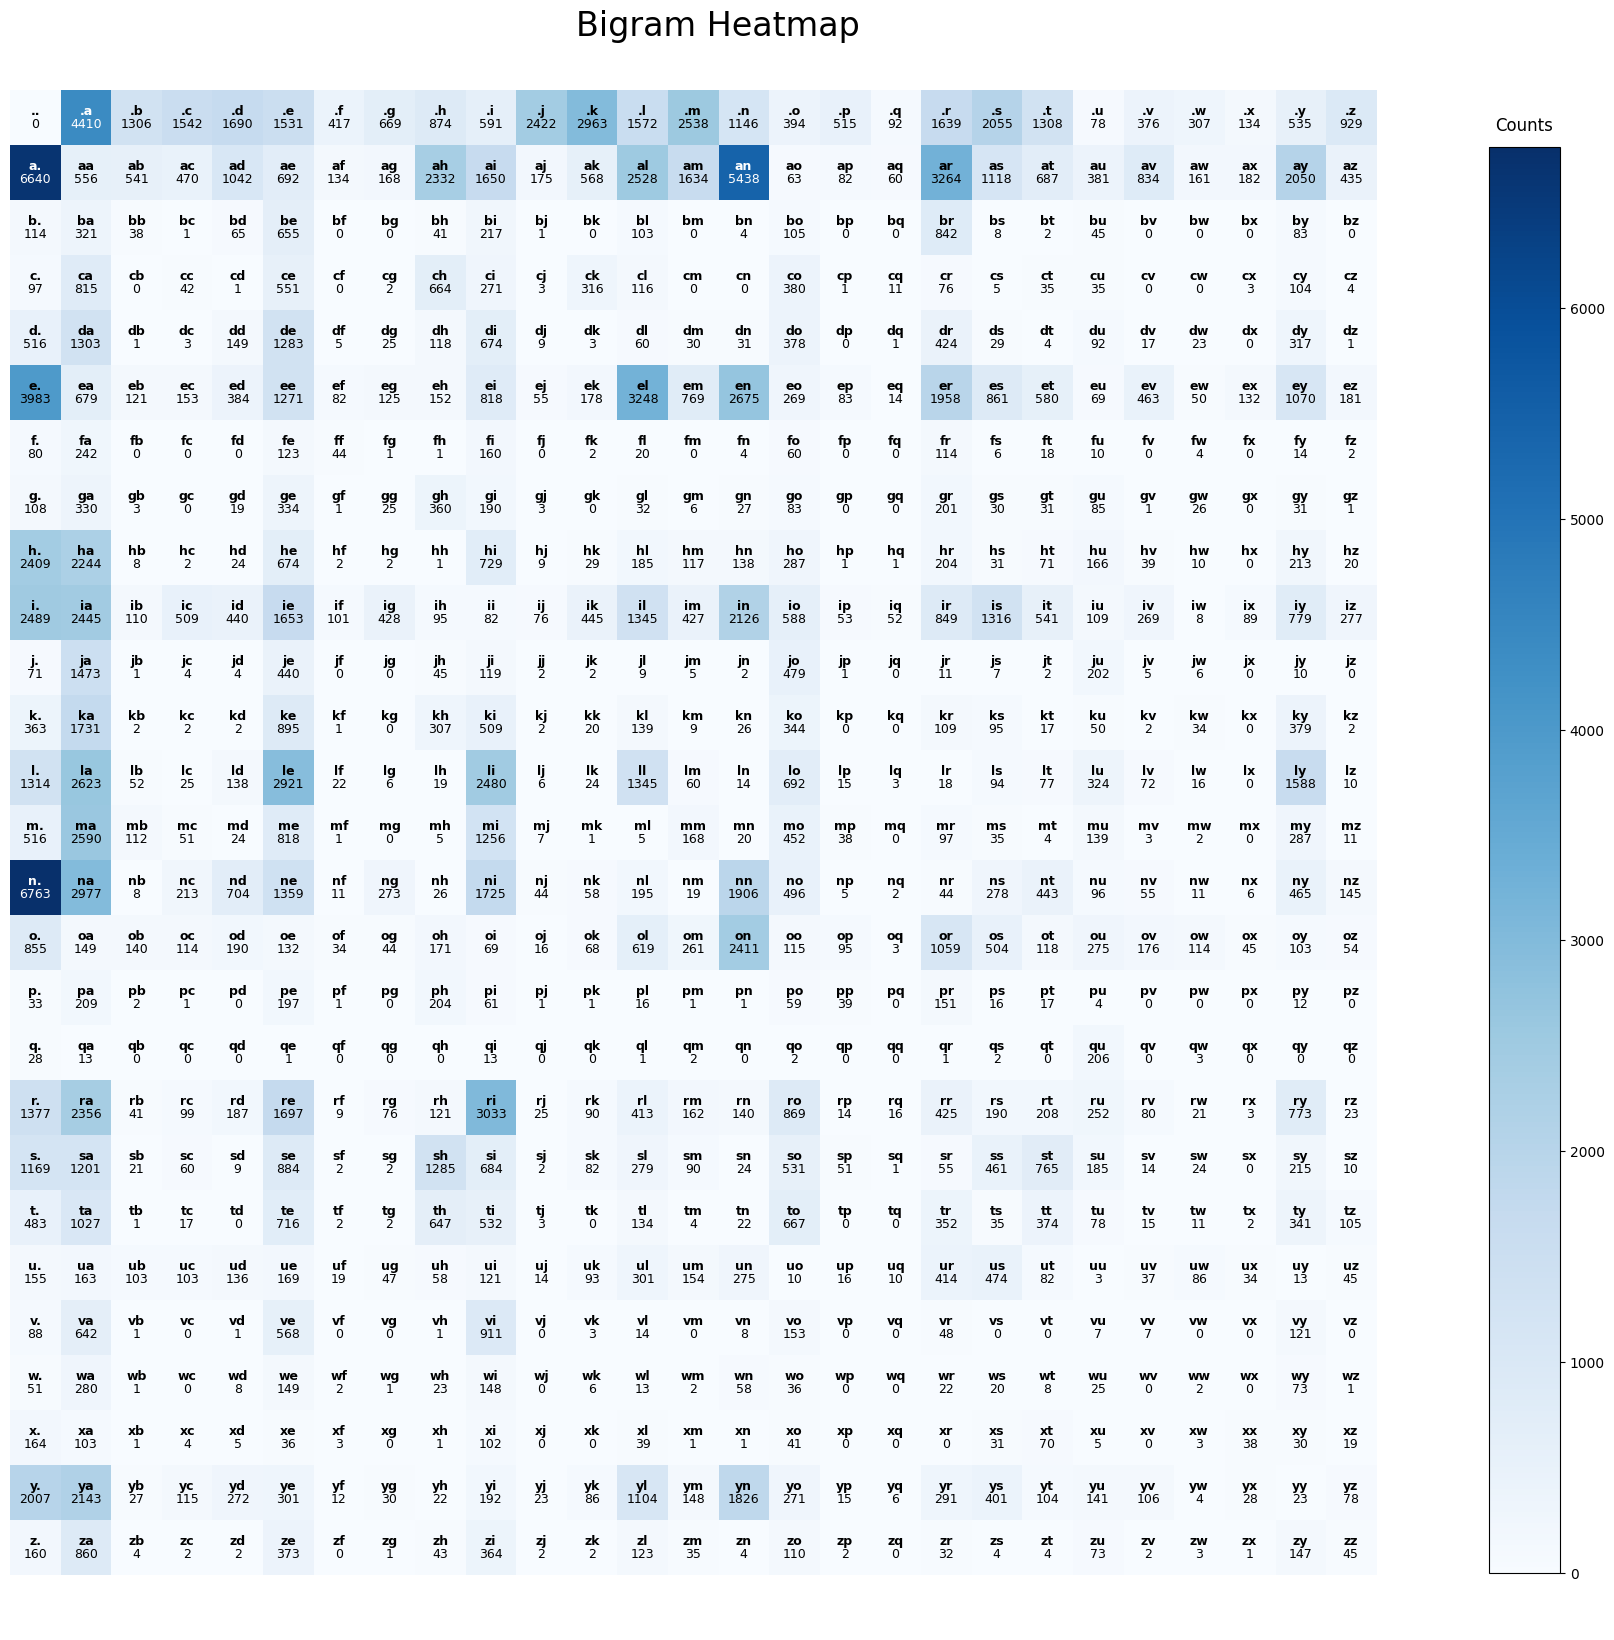

In [13]:
N = torch.zeros((27,27), dtype=torch.int32)
C = sorted(list(set(''.join(names))))
ctoi = {c:i+1 for i,c in enumerate(C)}
ctoi['.'] = 0
sorted(ctoi.items(), key = lambda v: v[1])
for n in names:
    n = ['.'] + list(n) +['.']
    for c1, c2 in zip(n, n[1:]):
        ix1, ix2 = ctoi[c1], ctoi[c2]
        N[ix1, ix2] += 1
plot_char_matrix(ctoi, N)

#### Step 4: Generate Samples
- Convert row to probabilities
- Create multinomial (https://pytorch.org/docs/stable/generated/torch.multinomial.html)
- Demonstrate how torch.multinomial works.
- Sample from distribution

In [14]:
N.shape[0]

27

In [15]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [16]:
torch.multinomial(p, num_samples=20, replacement=True)

tensor([13, 12,  8, 12, 12,  4, 16, 23, 19, 11, 10,  1,  5, 20, 19,  4, 20, 12,
        18, 11])

In [17]:
g = torch.Generator().manual_seed(42)


In [168]:
torch.multinomial(p, generator=g, num_samples=20, replacement=True)

tensor([25,  0, 11,  5, 25, 19,  9,  0, 14, 14, 14, 12,  0, 14, 12, 26,  3,  9,
        14,  5])

In [19]:
g = torch.Generator().manual_seed(42)
itos = {v: k for k, v in ctoi.items()}

for i in range(5):
    ix = 0
    l = []
    while True:
        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        l.append(itos[ix])
        if ix == 0:
            break
    print(l)

['a', 'n', 'u', 'g', 'e', 'e', 'n', 'v', 'i', '.']
['s', '.']
['m', 'a', 'b', 'i', 'a', 'n', '.']
['d', 'a', 'n', '.']
['s', 't', 'a', 'n', '.']


#### Step 5: Efficient Computation of P and Broadcasting rules.
- Explain pytorch sum function (https://pytorch.org/docs/stable/generated/torch.sum.html)
- Pytorch Broadcasting Semantics (https://pytorch.org/docs/stable/notes/broadcasting.html)
- Rewrite the count statistics instead as probability statistics.

In [55]:
P[:,2].sum()

tensor(2645)

In [44]:
P.sum(1)

tensor([32033, 33885,  2645,  3532,  5496, 20423,   905,  1927,  7616, 17701,
         2900,  5040, 13958,  6642, 18327,  7934,  1026,   272, 12700,  8106,
         5570,  3135,  2573,   929,   697,  9776,  2398])

In [3]:
print(P[0].sum())
print(P[1].sum())

NameError: name 'P' is not defined

In [250]:
P_ = P / P.sum(1, keepdims=True)
P_[0].sum()

tensor(1.)

#### General Broadcasting semantics

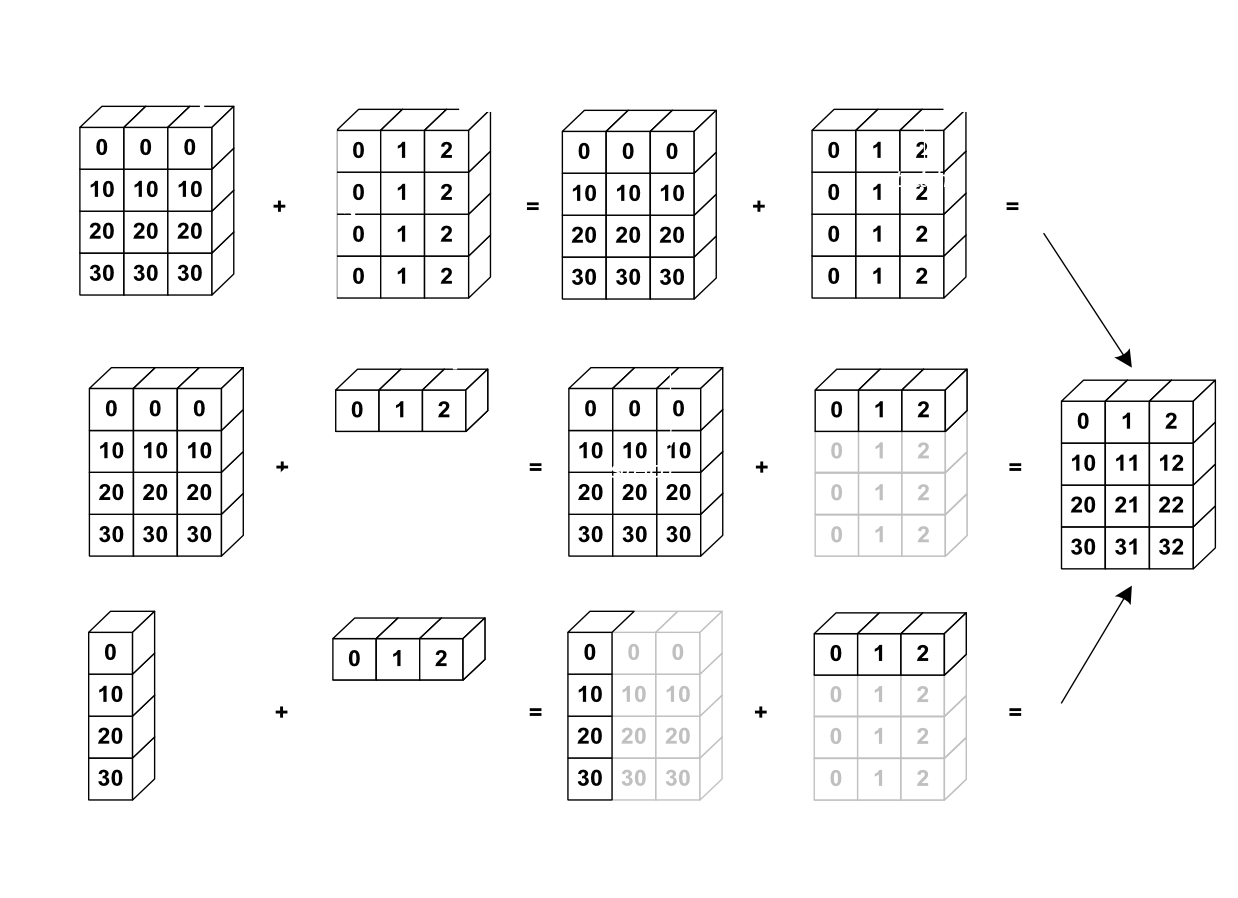

#### Pytorch Broadcasting Rules
Two tensors are “broadcastable” if the following rules hold:

Each tensor has at least one dimension.

When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.


In [ ]:
# N: 27 27
# P: 

In [400]:
P = N.float()
P_ = (P / P.sum(1,keepdims=True))
P_[0].sum()

tensor(1.)

In [401]:
# 27, 27
#  1, 27

In [402]:
P[0].sum()

tensor(32033.)

In [404]:
P = N.float()
P = P / P.sum(1, keepdims=True)
C = sorted(list(set(''.join(names))))
ctoi = {c:i+1 for i,c in enumerate(C)}
ctoi['.'] = 0
sorted(ctoi.items(), key = lambda v: v[1])
for n in names[:1]:
    n = ['.'] + list(n) +['.']
    for c1, c2 in zip(n, n[1:]): 
        ix1, ix2 = ctoi[c1], ctoi[c2]
        prob = P[ix1, ix2]
        print(f"Probability of {c1}{c2}: {prob:.4f}")

Probability of .e: 0.0478
Probability of em: 0.0377
Probability of mm: 0.0253
Probability of ma: 0.3899
Probability of a.: 0.1960


- Probabilities should be as close to one as possible.
- Ergo. the product of all the probabilities should be = 1 for a perfect model.
- Products are messy to work with so we take logs.

#### Step 6: Calculating how well our model fits the data.

We redefine our notation for the likelihood function for our character level bigram model where we use the fact that the probability of the current character only depends on the previous character in the case of a Markov model.


\begin{equation}
\mathcal{L}(\theta) = \prod_{i=1}^{T} P(c_i | c_{i-N+1}, ..., c_{i-1}; \theta) \\
\mathcal{L} = \prod_{i=1}^{T} P(c_i | c_{i-1})
\end{equation}


Since $P(c_i | c_{i-1})$ is a probability and therefore can have a maximum value of 1. It follows that the maximum value of $\mathcal{L}$ must also be 1.


\begin{align}
\log(\mathcal{L}) &= \sum_{i=1}^{T} \log(P(c_i | c_{i-1})) \
&\leq \sum_{i=1}^{T} \log(1) \
&= 0
\end{align}

where we used the fact that $\log(x)$ is increasing for $x > 0$ and $0 \leq P(c_i | c_{i-1}) \leq 1$ to obtain the inequality.

Therefore, we can conclude that $\mathcal{L} \leq 1$, and the maximum value of $\mathcal{L}$ is 1 when $P(c_i | c_{i-1}) = 1$ forall $i$.


<div class="definition">
<b>Definition 3:</b> The negative log likelihood loss function, denoted by $NNL$, is defined as follows:

\begin{equation}
NLL(\theta)= - \sum_{i=1}^{T} \log P(c_i | c_{i-N+1}, ..., c_{i-1}; \theta)
\end{equation}
    

where $\theta$ represents the model parameters, and $P(c_i | c_{i-1})$ is the probability of the current character $c_i$ given the previous characters $c_{i-N+1}, ..., c_{i-1}$ and $T$ is the number of training examples.

We can further simplify the calculation of the negative log likelihood for our bigram model as follows:
    
\begin{equation}
NLL= - \sum_{i=1}^{T} \log P(c_i | c_{i-1})
\end{equation} 

#### Computing the negative log liklihood

In [56]:
P = N.float()
P = P / P.sum(1, keepdims=True)
C = sorted(list(set(''.join(names))))
ctoi = {c:i+1 for i,c in enumerate(C)}
ctoi['.'] = 0
sorted(ctoi.items(), key = lambda v: v[1])


nll = 0
count = 0
for n in names[:1]:
    n = ['.'] + list(n) +['.']
    for c1, c2 in zip(n, n[1:]): 
        ix1, ix2 = ctoi[c1], ctoi[c2]
        prob = P[ix1, ix2]
        logprob = prob.log()
        nll += logprob
        print(f"Probability of {c1}{c2}: {prob:.4f} , logprob: {logprob:.4f}")
        count += 1
nll /= count
nll *= -1
print(f'{nll=}')

Probability of .e: 0.0478 , logprob: -3.0408
Probability of em: 0.0377 , logprob: -3.2793
Probability of mm: 0.0253 , logprob: -3.6772
Probability of ma: 0.3899 , logprob: -0.9418
Probability of a.: 0.1960 , logprob: -1.6299
nll=tensor(2.5138)


#### Computing the negative log liklihood more efficiently

- Get rid of `for` loops

In [90]:
A = torch.rand((3,3))

In [93]:
A

tensor([[0.0949, 0.4626, 0.9865],
        [0.5309, 0.6164, 0.4223],
        [0.6001, 0.1463, 0.2664]])

In [91]:
torch.tensor([1])


tensor([1])

In [92]:
x = F.one_hot(indexes, num_classes=3).float()

x @ A

tensor([[0.5309, 0.6164, 0.4223]])

In [88]:
import torch.nn.functional as F

A = torch.eye(3,3)
indexes = torch.tensor([1])
x = F.one_hot(indexes, num_classes=3).float()
x @ A

tensor([[0., 1., 0.]])

In [60]:
xs = []
ys = []

for n in names[:1]:
    n = ['.'] + list(n) +['.']
    for c1, c2 in zip(n, n[1:]): 
        ix1, ix2 = ctoi[c1], ctoi[c2]
        xs.append(ix1)
        ys.append(ix2)


In [68]:
xs

[0, 5, 13, 13, 1]

In [69]:
ys

[5, 13, 13, 1, 0]

In [71]:
P = N.float()
P = P / P.sum(1, keepdims=True)

In [80]:
P = N.float()
P = P / P.sum(1, keepdims=True)
X = F.one_hot(torch.tensor(xs), num_classes=27).float()
Z = X @ P
Z[torch.arange(len(X)), torch.tensor(ys)].log()

tensor([-3.0408, -3.2793, -3.6772, -0.9418, -1.6299])

In [79]:
Z[0]

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [77]:
Z

tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9503e-01, 3.3247e-02, 5.9247e-03, 7.4916e-03, 1.8802e-02, 6.2234e-02,
         4.0151e-03, 6.1206e-03, 7.4426e-03, 4.0053e-02, 2.6930e-03, 8.7157e-03,
         1.5904e-01, 3.7654e-02, 1.3098e-01, 1.3171e-02, 4.0640e-03, 6.8550e-04,
         9.5872e-02, 4.2158e-02, 2.8399e-02, 3.3785e-03, 2.2671e-02, 2.4482e-03,
         6.4633e-03, 5.2392e-02, 8.8626e-03],
        [7.7687e-02, 3.8994e-01, 1.6862e-02, 7.6784e-03, 3.6134e-03, 1.2316e-01,
         1.5056e-04, 0.0000e+00, 7.5279e-04, 1.8910e-01, 1.0539e-03, 1.5056e-04,
         7.5279e-04, 2.5294e-02, 3.0111e-03, 6.8052e-02, 5.7212e-03, 0.0000e+00,
         1.4604e-